# PART A

# 1. Import and Understand the data [7 Marks]
#    A. Import and read ‘images.npy’. [1 Marks]
#    B. Split the data into Features(X) & labels(Y). Unify shape of all the images. [3 Marks]
#    Imp Note: Replace all the pixels within masked area with 1.
#        Hint: X will comprise of array of image whereas Y will comprise of coordinates of the mask(human face). Observe: data[0], data[0][0], data[0][1].
#    C. Split the data into train and test[400:9]. [1 Marks]
#    D. Select random image from the train data and display original image and masked image. [2 Marks

In [2]:
# A. Import and read ‘images.npy’. [1 Marks]

import numpy as np
data = np.load('images.npy', allow_pickle = True)

# B. Split the data into Features(X) & labels(Y). Unify shape of all the images. [3 Marks]
#     Imp Note: Replace all the pixels within masked area with 1.
#     Hint: X will comprise of array of image whereas Y will comprise of coordinates of the mask(human face). Observe: data[0], data[0][0], data[0][1]

In [3]:
data

array([[array([[[42, 37, 34],
                [56, 51, 48],
                [71, 66, 63],
                ...,
                [23, 33, 34],
                [26, 36, 37],
                [28, 38, 39]],

               [[40, 35, 32],
                [51, 46, 43],
                [64, 59, 56],
                ...,
                [27, 36, 35],
                [24, 33, 32],
                [26, 35, 34]],

               [[43, 38, 35],
                [51, 46, 43],
                [61, 56, 53],
                ...,
                [28, 30, 27],
                [33, 35, 32],
                [35, 37, 34]],

               ...,

               [[56, 47, 40],
                [57, 48, 41],
                [61, 52, 45],
                ...,
                [67, 48, 42],
                [55, 35, 28],
                [60, 40, 33]],

               [[53, 44, 37],
                [54, 45, 38],
                [57, 48, 41],
                ...,
                [59, 40, 34],
                [60, 40, 3

# Images Loaded

[[[  4   0   1]
  [  0   3   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   2]
  [  5   1   2]]

 [[  0   2   1]
  [ 69  81  71]
  [ 72  79  71]
  ...
  [111 121 122]
  [113 122 121]
  [  0   0   0]]

 [[  0   0   0]
  [ 71  83  71]
  [ 70  81  67]
  ...
  [113 123 125]
  [114 122 124]
  [  0   0   0]]

 ...

 [[  0   3   0]
  [ 68  76  65]
  [ 67  78  62]
  ...
  [145 155 120]
  [133 143 106]
  [  0   1   3]]

 [[  1   1   0]
  [ 69  72  61]
  [ 67  73  59]
  ...
  [148 155 121]
  [137 145 104]
  [  0   1   3]]

 [[  1   1   3]
  [  1   1   1]
  [  0   0   2]
  ...
  [  0   0   0]
  [  0   0   2]
  [  0   0   0]]]


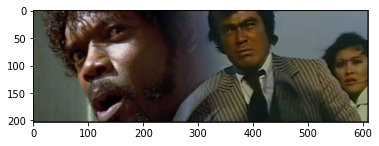

In [4]:
import matplotlib.pyplot as plt
import cv2
print(data[70][0])
plt.imshow(data[70][0])

# Mask

In [5]:
data[70][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.05901639344262295, 'y': 0.04433497536945813},
   {'x': 0.460655737704918, 'y': 0.9753694581280788}],
  'imageWidth': 610,
  'imageHeight': 203},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5131147540983606, 'y': 0.04926108374384237},
   {'x': 0.760655737704918, 'y': 0.5812807881773399}],
  'imageWidth': 610,
  'imageHeight': 203},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.8967213114754098, 'y': 0.2315270935960591},
   {'x': 1, 'y': 0.6600985221674877}],
  'imageWidth': 610,
  'imageHeight': 203}]

In [6]:
# Set image dimensions
# Initialize image height, image width with value: 224

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [7]:
import tensorflow as tf
print('TensorFlow Version: ', tf.__version__)
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype = np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

TensorFlow Version:  2.8.0


# Print the shape of X_train and Y means mask array 

In [8]:
print('Shape of X_train: ', X_train.shape)

Shape of X_train:  (409, 224, 224, 3)


In [9]:
print('Shape of mask array: ', masks.shape)

Shape of mask array:  (409, 224, 224)


# C. Split the data into train and test[400:9]. [1 Marks]

# D. Select random image from the train data and display original image and masked image. [2 Marks]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.86666667 -0.86666667 -0.86666667]
  [-0.89019608 -0.87450981 -0.88235295]
  [-0.87450981 -0.86666667 -0.8509804 ]
  ...
  [-0.87450981 -0.87450981 -0.89019608]
  [-0.86666667 -0.86666667 -0.86666667]
  [-0.88235295 -0.89019608 -0.8509804 ]]

 [[-0.86666667 -0.86666667 -0.87450981]
  [-0.88235295 -0.86666667 -0.87450981]
  [-0.87450981 -0.87450981 -0.8509804 ]
  ...
  [-0.87450981 -0.87450981 -0.89019608]
  [-0.87450981 -0.87450981 -0.86666667]
  [-0.88235295 -0.89019608 -0.8509804 ]]

 [[-0.86666667 -0.86666667 -0.88235295]
  [-0.86666667 -0.87450981 -0.87450981]
  [-0.87450981 -0.85882354 -0.86666667]
  ...
  [-0.86666667 -0.86666667 -0.88235295]
  [-0.86666667 -0.86666667 -0.86666667]
  [-0.88235295 -0.88235295 -0.8509804 ]]

 ...

 [[-0.78039217 -0.7647059  -0.86666667]
  [-0.80392158 -0.79607844 -0.89803922]
  [-0.74117649 -0.77254903 -0.85882354]
  ...
  [-0.31764704 -0.35686272 -0.38039213]
  [-0.38823527 -0.38823527 -0.41176468]
  [-0.18431371 -0.16862744 -0.16862744]]

 [

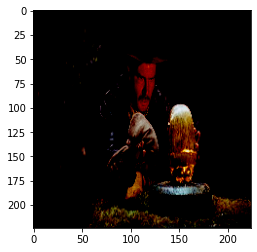

In [10]:
n = 7
print(X_train[n])
plt.imshow(X_train[n])

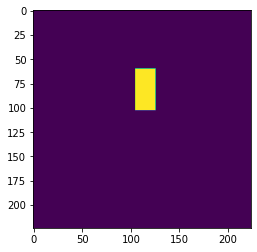

In [11]:
plt.imshow(masks[n])

# 2. A. Design a face mask detection model. [4 Marks]
#    Hint: 1. Use MobileNet architecture for initial pre-trained non-trainable layers.
#    Hint: 2. Add appropriate Upsampling layers to imitate U-net architectur

Create the model 
- Add MobileNet as model with below parameter values
    - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
    - include_top: False
    - alpha: 1.0
    - weights: "imagenet"
- Add UNET architecture layers
    - This is the trickiest part of the project, you need to research and implement it correctly

In [12]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [13]:
def create_model(trainable = True):
    IMG_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, 3)
    model = MobileNet(input_shape = IMG_SHAPE, alpha = 1.0, include_top = False, weights = 'imagenet')
    for layer in model.layers:
        layer.trainable = trainable

    block0 = model.get_layer('conv_pw_1_relu').output
    block1 = model.get_layer('conv_pw_3_relu').output
    block2 = model.get_layer('conv_pw_5_relu').output
    block3 = model.get_layer('conv_pw_11_relu').output
    block4 = model.get_layer('conv_pw_13_relu').output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size = 1, activation = "sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs = model.input, outputs = x)

# Call the create_model function

In [14]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                             

 on)                                                                                              
                                                                                                  
 conv_dw_5_relu (ReLU)          (None, 28, 28, 256)  0           ['conv_dw_5_bn[0][0]']           
                                                                                                  
 conv_pw_5 (Conv2D)             (None, 28, 28, 256)  65536       ['conv_dw_5_relu[0][0]']         
                                                                                                  
 conv_pw_5_bn (BatchNormalizati  (None, 28, 28, 256)  1024       ['conv_pw_5[0][0]']              
 on)                                                                                              
                                                                                                  
 conv_pw_5_relu (ReLU)          (None, 28, 28, 256)  0           ['conv_pw_5_bn[0][0]']           
          

 conv_dw_11 (DepthwiseConv2D)   (None, 14, 14, 512)  4608        ['conv_pw_10_relu[0][0]']        
                                                                                                  
 conv_dw_11_bn (BatchNormalizat  (None, 14, 14, 512)  2048       ['conv_dw_11[0][0]']             
 ion)                                                                                             
                                                                                                  
 conv_dw_11_relu (ReLU)         (None, 14, 14, 512)  0           ['conv_dw_11_bn[0][0]']          
                                                                                                  
 conv_pw_11 (Conv2D)            (None, 14, 14, 512)  262144      ['conv_dw_11_relu[0][0]']        
                                                                                                  
 conv_pw_11_bn (BatchNormalizat  (None, 14, 14, 512)  2048       ['conv_pw_11[0][0]']             
 ion)     

# B. Design your own Dice Coefficient and Loss function. [2 Marks]

In [15]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

# Define loss

In [16]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

Complie the model using below parameters
- loss: use the loss function defined above
- optimizers: use Adam optimizer
- metrics: use dice_coefficient function defined above

In [17]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Define checkpoint and earlystopping

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

# C. Train and tune the model as required. [3 Marks]

# Fit the model using below parameters
- epochs: you can decide
- batch_size: 1
- callbacks: checkpoint, reduce_lr, stop

In [19]:
model.fit(X_train, masks, epochs = 10, batch_size = 1, validation_split = 0.1,  #splitting 10% of data into validation set          
                    callbacks = [checkpoint, reduce_lr, stop],
                    workers = 8,
                    use_multiprocessing = True,                    
                    verbose = 1)

Epoch 1/10

Epoch 1: loss improved from inf to 4.68149, saving model to model-4.68.h5
  1/368 [..............................] - ETA: 22:17 - loss: 4.6815 - dice_coefficient: 0.0567
Epoch 1: loss improved from 4.68149 to 4.11912, saving model to model-4.12.h5
  2/368 [..............................] - ETA: 7:45 - loss: 4.1191 - dice_coefficient: 0.1078 
Epoch 1: loss improved from 4.11912 to 4.04820, saving model to model-4.05.h5
  3/368 [..............................] - ETA: 6:48 - loss: 4.0482 - dice_coefficient: 0.1048
Epoch 1: loss did not improve from 4.04820
  4/368 [..............................] - ETA: 6:31 - loss: 4.1801 - dice_coefficient: 0.0925
Epoch 1: loss improved from 4.04820 to 4.01739, saving model to model-4.02.h5
  5/368 [..............................] - ETA: 6:35 - loss: 4.0174 - dice_coefficient: 0.1062
Epoch 1: loss improved from 4.01739 to 3.88460, saving model to model-3.88.h5
  6/368 [..............................] - ETA: 6:30 - loss: 3.8846 - dice_coeffic

 50/368 [===>..........................] - ETA: 5:13 - loss: 2.1425 - dice_coefficient: 0.3131
Epoch 1: loss improved from 2.14253 to 2.13095, saving model to model-2.13.h5
 51/368 [===>..........................] - ETA: 5:12 - loss: 2.1310 - dice_coefficient: 0.3127
Epoch 1: loss did not improve from 2.13095
 52/368 [===>..........................] - ETA: 5:12 - loss: 2.1324 - dice_coefficient: 0.3095
Epoch 1: loss improved from 2.13095 to 2.10689, saving model to model-2.11.h5
 53/368 [===>..........................] - ETA: 5:11 - loss: 2.1069 - dice_coefficient: 0.3146
Epoch 1: loss improved from 2.10689 to 2.09266, saving model to model-2.09.h5
 54/368 [===>..........................] - ETA: 5:10 - loss: 2.0927 - dice_coefficient: 0.3155
Epoch 1: loss improved from 2.09266 to 2.08044, saving model to model-2.08.h5
 55/368 [===>..........................] - ETA: 5:10 - loss: 2.0804 - dice_coefficient: 0.3154
Epoch 1: loss improved from 2.08044 to 2.07729, saving model to model-2.08.

 99/368 [=======>......................] - ETA: 4:31 - loss: 1.7655 - dice_coefficient: 0.3560
Epoch 1: loss improved from 1.75898 to 1.75641, saving model to model-1.76.h5
100/368 [=======>......................] - ETA: 4:30 - loss: 1.7564 - dice_coefficient: 0.3585
Epoch 1: loss did not improve from 1.75641
101/368 [=======>......................] - ETA: 4:29 - loss: 1.7593 - dice_coefficient: 0.3595
Epoch 1: loss improved from 1.75641 to 1.75431, saving model to model-1.75.h5
102/368 [=======>......................] - ETA: 4:28 - loss: 1.7543 - dice_coefficient: 0.3599
Epoch 1: loss did not improve from 1.75431
103/368 [=======>......................] - ETA: 4:27 - loss: 1.7545 - dice_coefficient: 0.3585
Epoch 1: loss improved from 1.75431 to 1.74627, saving model to model-1.75.h5
104/368 [=======>......................] - ETA: 4:26 - loss: 1.7463 - dice_coefficient: 0.3599
Epoch 1: loss improved from 1.74627 to 1.73752, saving model to model-1.74.h5
105/368 [=======>...............

150/368 [===========>..................] - ETA: 3:37 - loss: 1.6079 - dice_coefficient: 0.3895
Epoch 1: loss did not improve from 1.60345
151/368 [===========>..................] - ETA: 3:36 - loss: 1.6155 - dice_coefficient: 0.3876
Epoch 1: loss did not improve from 1.60345
152/368 [===========>..................] - ETA: 3:35 - loss: 1.6108 - dice_coefficient: 0.3886
Epoch 1: loss did not improve from 1.60345
153/368 [===========>..................] - ETA: 3:34 - loss: 1.6119 - dice_coefficient: 0.3874
Epoch 1: loss did not improve from 1.60345
154/368 [===========>..................] - ETA: 3:33 - loss: 1.6108 - dice_coefficient: 0.3881
Epoch 1: loss did not improve from 1.60345
155/368 [===========>..................] - ETA: 3:32 - loss: 1.6074 - dice_coefficient: 0.3886
Epoch 1: loss did not improve from 1.60345
156/368 [===========>..................] - ETA: 3:31 - loss: 1.6075 - dice_coefficient: 0.3881
Epoch 1: loss improved from 1.60345 to 1.60116, saving model to model-1.60.h5

203/368 [===============>..............] - ETA: 2:41 - loss: 1.5421 - dice_coefficient: 0.4030
Epoch 1: loss improved from 1.54212 to 1.53997, saving model to model-1.54.h5
204/368 [===============>..............] - ETA: 2:40 - loss: 1.5400 - dice_coefficient: 0.4033
Epoch 1: loss did not improve from 1.53997
205/368 [===============>..............] - ETA: 2:39 - loss: 1.5404 - dice_coefficient: 0.4042
Epoch 1: loss improved from 1.53997 to 1.53940, saving model to model-1.54.h5
206/368 [===============>..............] - ETA: 2:38 - loss: 1.5394 - dice_coefficient: 0.4041
Epoch 1: loss improved from 1.53940 to 1.53800, saving model to model-1.54.h5
207/368 [===============>..............] - ETA: 2:37 - loss: 1.5380 - dice_coefficient: 0.4044
Epoch 1: loss improved from 1.53800 to 1.53699, saving model to model-1.54.h5
208/368 [===============>..............] - ETA: 2:36 - loss: 1.5370 - dice_coefficient: 0.4040
Epoch 1: loss improved from 1.53699 to 1.53466, saving model to model-1.53.

259/368 [====================>.........] - ETA: 1:44 - loss: 1.5224 - dice_coefficient: 0.4106
Epoch 1: loss did not improve from 1.51826
260/368 [====================>.........] - ETA: 1:43 - loss: 1.5205 - dice_coefficient: 0.4113
Epoch 1: loss did not improve from 1.51826
261/368 [====================>.........] - ETA: 1:42 - loss: 1.5190 - dice_coefficient: 0.4115
Epoch 1: loss improved from 1.51826 to 1.51757, saving model to model-1.52.h5
262/368 [====================>.........] - ETA: 1:41 - loss: 1.5176 - dice_coefficient: 0.4116
Epoch 1: loss improved from 1.51757 to 1.51515, saving model to model-1.52.h5
263/368 [====================>.........] - ETA: 1:40 - loss: 1.5152 - dice_coefficient: 0.4119
Epoch 1: loss did not improve from 1.51515
264/368 [====================>.........] - ETA: 1:39 - loss: 1.5153 - dice_coefficient: 0.4113
Epoch 1: loss improved from 1.51515 to 1.51200, saving model to model-1.51.h5
265/368 [====================>.........] - ETA: 1:38 - loss: 1.5120

310/368 [========================>.....] - ETA: 55s - loss: 1.4635 - dice_coefficient: 0.4195
Epoch 1: loss improved from 1.46351 to 1.46188, saving model to model-1.46.h5
311/368 [========================>.....] - ETA: 54s - loss: 1.4619 - dice_coefficient: 0.4202
Epoch 1: loss improved from 1.46188 to 1.45925, saving model to model-1.46.h5
312/368 [========================>.....] - ETA: 53s - loss: 1.4593 - dice_coefficient: 0.4210
Epoch 1: loss improved from 1.45925 to 1.45717, saving model to model-1.46.h5
313/368 [========================>.....] - ETA: 52s - loss: 1.4572 - dice_coefficient: 0.4216
Epoch 1: loss improved from 1.45717 to 1.45596, saving model to model-1.46.h5
314/368 [========================>.....] - ETA: 51s - loss: 1.4560 - dice_coefficient: 0.4222
Epoch 1: loss improved from 1.45596 to 1.45392, saving model to model-1.45.h5
315/368 [========================>.....] - ETA: 50s - loss: 1.4539 - dice_coefficient: 0.4230
Epoch 1: loss improved from 1.45392 to 1.45179

360/368 [============================>.] - ETA: 7s - loss: 1.4067 - dice_coefficient: 0.4351
Epoch 1: loss did not improve from 1.40674
361/368 [============================>.] - ETA: 6s - loss: 1.4087 - dice_coefficient: 0.4343
Epoch 1: loss did not improve from 1.40674
362/368 [============================>.] - ETA: 5s - loss: 1.4071 - dice_coefficient: 0.4349
Epoch 1: loss did not improve from 1.40674
363/368 [============================>.] - ETA: 4s - loss: 1.4080 - dice_coefficient: 0.4343
Epoch 1: loss improved from 1.40674 to 1.40584, saving model to model-1.41.h5
364/368 [============================>.] - ETA: 3s - loss: 1.4058 - dice_coefficient: 0.4351
Epoch 1: loss improved from 1.40584 to 1.40409, saving model to model-1.40.h5
365/368 [============================>.] - ETA: 2s - loss: 1.4041 - dice_coefficient: 0.4355
Epoch 1: loss improved from 1.40409 to 1.40338, saving model to model-1.40.h5
366/368 [============================>.] - ETA: 1s - loss: 1.4034 - dice_coeffi

 48/368 [==>...........................] - ETA: 4:41 - loss: 0.7451 - dice_coefficient: 0.6088
Epoch 2: loss did not improve from 0.55652
 49/368 [==>...........................] - ETA: 4:42 - loss: 0.7399 - dice_coefficient: 0.6107
Epoch 2: loss did not improve from 0.55652
 50/368 [===>..........................] - ETA: 4:42 - loss: 0.7421 - dice_coefficient: 0.6111
Epoch 2: loss did not improve from 0.55652
 51/368 [===>..........................] - ETA: 4:41 - loss: 0.7728 - dice_coefficient: 0.6079
Epoch 2: loss did not improve from 0.55652
 52/368 [===>..........................] - ETA: 4:40 - loss: 0.7800 - dice_coefficient: 0.6050
Epoch 2: loss did not improve from 0.55652
 53/368 [===>..........................] - ETA: 4:39 - loss: 0.7761 - dice_coefficient: 0.6075
Epoch 2: loss did not improve from 0.55652
 54/368 [===>..........................] - ETA: 4:38 - loss: 0.7998 - dice_coefficient: 0.6052
Epoch 2: loss did not improve from 0.55652
 55/368 [===>.....................

107/368 [=======>......................] - ETA: 3:53 - loss: 0.9303 - dice_coefficient: 0.5994
Epoch 2: loss did not improve from 0.55652
108/368 [=======>......................] - ETA: 3:52 - loss: 0.9364 - dice_coefficient: 0.5961
Epoch 2: loss did not improve from 0.55652
109/368 [=======>......................] - ETA: 3:51 - loss: 0.9314 - dice_coefficient: 0.5974
Epoch 2: loss did not improve from 0.55652
110/368 [=======>......................] - ETA: 3:50 - loss: 0.9264 - dice_coefficient: 0.5994
Epoch 2: loss did not improve from 0.55652
111/368 [========>.....................] - ETA: 3:49 - loss: 0.9236 - dice_coefficient: 0.5998
Epoch 2: loss did not improve from 0.55652
112/368 [========>.....................] - ETA: 3:49 - loss: 0.9200 - dice_coefficient: 0.6013
Epoch 2: loss did not improve from 0.55652
113/368 [========>.....................] - ETA: 3:48 - loss: 0.9159 - dice_coefficient: 0.6026
Epoch 2: loss did not improve from 0.55652
114/368 [========>................

166/368 [============>.................] - ETA: 3:03 - loss: 0.8328 - dice_coefficient: 0.6126
Epoch 2: loss did not improve from 0.55652
167/368 [============>.................] - ETA: 3:02 - loss: 0.8357 - dice_coefficient: 0.6106
Epoch 2: loss did not improve from 0.55652
168/368 [============>.................] - ETA: 3:01 - loss: 0.8342 - dice_coefficient: 0.6112
Epoch 2: loss did not improve from 0.55652
169/368 [============>.................] - ETA: 3:00 - loss: 0.8349 - dice_coefficient: 0.6116
Epoch 2: loss did not improve from 0.55652
170/368 [============>.................] - ETA: 2:59 - loss: 0.8397 - dice_coefficient: 0.6115
Epoch 2: loss did not improve from 0.55652
171/368 [============>.................] - ETA: 2:58 - loss: 0.8367 - dice_coefficient: 0.6126
Epoch 2: loss did not improve from 0.55652
172/368 [=============>................] - ETA: 2:57 - loss: 0.8349 - dice_coefficient: 0.6130
Epoch 2: loss did not improve from 0.55652
173/368 [=============>...........

225/368 [=================>............] - ETA: 2:09 - loss: 0.8087 - dice_coefficient: 0.6175
Epoch 2: loss did not improve from 0.55652
226/368 [=================>............] - ETA: 2:09 - loss: 0.8071 - dice_coefficient: 0.6182
Epoch 2: loss did not improve from 0.55652
227/368 [=================>............] - ETA: 2:08 - loss: 0.8075 - dice_coefficient: 0.6174
Epoch 2: loss did not improve from 0.55652
228/368 [=================>............] - ETA: 2:07 - loss: 0.8082 - dice_coefficient: 0.6173
Epoch 2: loss did not improve from 0.55652
229/368 [=================>............] - ETA: 2:06 - loss: 0.8066 - dice_coefficient: 0.6178
Epoch 2: loss did not improve from 0.55652
230/368 [=================>............] - ETA: 2:05 - loss: 0.8062 - dice_coefficient: 0.6176
Epoch 2: loss did not improve from 0.55652
231/368 [=================>............] - ETA: 2:04 - loss: 0.8060 - dice_coefficient: 0.6171
Epoch 2: loss did not improve from 0.55652
232/368 [=================>.......

284/368 [======================>.......] - ETA: 1:16 - loss: 0.8070 - dice_coefficient: 0.6093
Epoch 2: loss did not improve from 0.55652
285/368 [======================>.......] - ETA: 1:15 - loss: 0.8063 - dice_coefficient: 0.6093
Epoch 2: loss did not improve from 0.55652
286/368 [======================>.......] - ETA: 1:14 - loss: 0.8064 - dice_coefficient: 0.6089
Epoch 2: loss did not improve from 0.55652
287/368 [======================>.......] - ETA: 1:14 - loss: 0.8070 - dice_coefficient: 0.6083
Epoch 2: loss did not improve from 0.55652
288/368 [======================>.......] - ETA: 1:13 - loss: 0.8064 - dice_coefficient: 0.6084
Epoch 2: loss did not improve from 0.55652
289/368 [======================>.......] - ETA: 1:12 - loss: 0.8049 - dice_coefficient: 0.6091
Epoch 2: loss did not improve from 0.55652
290/368 [======================>.......] - ETA: 1:11 - loss: 0.8043 - dice_coefficient: 0.6092
Epoch 2: loss did not improve from 0.55652
291/368 [======================>..

343/368 [==========================>...] - ETA: 22s - loss: 0.8051 - dice_coefficient: 0.6079
Epoch 2: loss did not improve from 0.55652
344/368 [===========================>..] - ETA: 21s - loss: 0.8051 - dice_coefficient: 0.6079
Epoch 2: loss did not improve from 0.55652
345/368 [===========================>..] - ETA: 20s - loss: 0.8047 - dice_coefficient: 0.6079
Epoch 2: loss did not improve from 0.55652
346/368 [===========================>..] - ETA: 20s - loss: 0.8038 - dice_coefficient: 0.6082
Epoch 2: loss did not improve from 0.55652
347/368 [===========================>..] - ETA: 19s - loss: 0.8036 - dice_coefficient: 0.6083
Epoch 2: loss did not improve from 0.55652
348/368 [===========================>..] - ETA: 18s - loss: 0.8070 - dice_coefficient: 0.6081
Epoch 2: loss did not improve from 0.55652
349/368 [===========================>..] - ETA: 17s - loss: 0.8069 - dice_coefficient: 0.6083
Epoch 2: loss did not improve from 0.55652
350/368 [===========================>..] 

 34/368 [=>............................] - ETA: 5:10 - loss: 0.5504 - dice_coefficient: 0.7168
Epoch 3: loss did not improve from 0.41398
 35/368 [=>............................] - ETA: 5:11 - loss: 0.5538 - dice_coefficient: 0.7127
Epoch 3: loss did not improve from 0.41398
 36/368 [=>............................] - ETA: 5:12 - loss: 0.5554 - dice_coefficient: 0.7097
Epoch 3: loss did not improve from 0.41398
 37/368 [==>...........................] - ETA: 5:13 - loss: 0.5611 - dice_coefficient: 0.7044
Epoch 3: loss did not improve from 0.41398
 38/368 [==>...........................] - ETA: 5:14 - loss: 0.5732 - dice_coefficient: 0.6968
Epoch 3: loss did not improve from 0.41398
 39/368 [==>...........................] - ETA: 5:14 - loss: 0.5719 - dice_coefficient: 0.6962
Epoch 3: loss did not improve from 0.41398
 40/368 [==>...........................] - ETA: 5:15 - loss: 0.5669 - dice_coefficient: 0.6979
Epoch 3: loss did not improve from 0.41398
 41/368 [==>......................

 93/368 [======>.......................] - ETA: 4:16 - loss: 0.7426 - dice_coefficient: 0.6791
Epoch 3: loss did not improve from 0.41398
 94/368 [======>.......................] - ETA: 4:15 - loss: 0.7389 - dice_coefficient: 0.6797
Epoch 3: loss did not improve from 0.41398
 95/368 [======>.......................] - ETA: 4:14 - loss: 0.7404 - dice_coefficient: 0.6780
Epoch 3: loss did not improve from 0.41398
 96/368 [======>.......................] - ETA: 4:13 - loss: 0.7378 - dice_coefficient: 0.6778
Epoch 3: loss did not improve from 0.41398
 97/368 [======>.......................] - ETA: 4:12 - loss: 0.7374 - dice_coefficient: 0.6764
Epoch 3: loss did not improve from 0.41398
 98/368 [======>.......................] - ETA: 4:11 - loss: 0.7331 - dice_coefficient: 0.6775
Epoch 3: loss did not improve from 0.41398
 99/368 [=======>......................] - ETA: 4:10 - loss: 0.7285 - dice_coefficient: 0.6791
Epoch 3: loss did not improve from 0.41398
100/368 [=======>.................

152/368 [===========>..................] - ETA: 3:17 - loss: 0.6776 - dice_coefficient: 0.6768
Epoch 3: loss did not improve from 0.41398
153/368 [===========>..................] - ETA: 3:16 - loss: 0.6775 - dice_coefficient: 0.6767
Epoch 3: loss did not improve from 0.41398
154/368 [===========>..................] - ETA: 3:15 - loss: 0.6745 - dice_coefficient: 0.6776
Epoch 3: loss did not improve from 0.41398
155/368 [===========>..................] - ETA: 3:14 - loss: 0.6735 - dice_coefficient: 0.6775
Epoch 3: loss did not improve from 0.41398
156/368 [===========>..................] - ETA: 3:13 - loss: 0.6724 - dice_coefficient: 0.6774
Epoch 3: loss did not improve from 0.41398
157/368 [===========>..................] - ETA: 3:12 - loss: 0.6714 - dice_coefficient: 0.6774
Epoch 3: loss did not improve from 0.41398
158/368 [===========>..................] - ETA: 3:11 - loss: 0.6737 - dice_coefficient: 0.6777
Epoch 3: loss did not improve from 0.41398
159/368 [===========>.............

211/368 [================>.............] - ETA: 2:21 - loss: 0.6503 - dice_coefficient: 0.6771
Epoch 3: loss did not improve from 0.41398
212/368 [================>.............] - ETA: 2:20 - loss: 0.6493 - dice_coefficient: 0.6774
Epoch 3: loss did not improve from 0.41398
213/368 [================>.............] - ETA: 2:19 - loss: 0.6484 - dice_coefficient: 0.6773
Epoch 3: loss did not improve from 0.41398
214/368 [================>.............] - ETA: 2:18 - loss: 0.6472 - dice_coefficient: 0.6779
Epoch 3: loss did not improve from 0.41398
215/368 [================>.............] - ETA: 2:17 - loss: 0.6465 - dice_coefficient: 0.6779
Epoch 3: loss did not improve from 0.41398
216/368 [================>.............] - ETA: 2:16 - loss: 0.6457 - dice_coefficient: 0.6777
Epoch 3: loss did not improve from 0.41398
217/368 [================>.............] - ETA: 2:16 - loss: 0.6451 - dice_coefficient: 0.6777
Epoch 3: loss did not improve from 0.41398
218/368 [================>........

270/368 [=====================>........] - ETA: 1:27 - loss: 0.6322 - dice_coefficient: 0.6793
Epoch 3: loss did not improve from 0.41398
271/368 [=====================>........] - ETA: 1:26 - loss: 0.6316 - dice_coefficient: 0.6797
Epoch 3: loss did not improve from 0.41398
272/368 [=====================>........] - ETA: 1:25 - loss: 0.6314 - dice_coefficient: 0.6795
Epoch 3: loss did not improve from 0.41398
273/368 [=====================>........] - ETA: 1:25 - loss: 0.6319 - dice_coefficient: 0.6792
Epoch 3: loss did not improve from 0.41398
274/368 [=====================>........] - ETA: 1:24 - loss: 0.6313 - dice_coefficient: 0.6794
Epoch 3: loss did not improve from 0.41398
275/368 [=====================>........] - ETA: 1:23 - loss: 0.6313 - dice_coefficient: 0.6791
Epoch 3: loss did not improve from 0.41398
276/368 [=====================>........] - ETA: 1:22 - loss: 0.6314 - dice_coefficient: 0.6791
Epoch 3: loss did not improve from 0.41398
277/368 [=====================>...

329/368 [=========================>....] - ETA: 34s - loss: 0.6285 - dice_coefficient: 0.6772
Epoch 3: loss did not improve from 0.41398
330/368 [=========================>....] - ETA: 33s - loss: 0.6292 - dice_coefficient: 0.6765
Epoch 3: loss did not improve from 0.41398
331/368 [=========================>....] - ETA: 33s - loss: 0.6290 - dice_coefficient: 0.6765
Epoch 3: loss did not improve from 0.41398
332/368 [==========================>...] - ETA: 32s - loss: 0.6285 - dice_coefficient: 0.6766
Epoch 3: loss did not improve from 0.41398
333/368 [==========================>...] - ETA: 31s - loss: 0.6279 - dice_coefficient: 0.6768
Epoch 3: loss did not improve from 0.41398
334/368 [==========================>...] - ETA: 30s - loss: 0.6293 - dice_coefficient: 0.6759
Epoch 3: loss did not improve from 0.41398
335/368 [==========================>...] - ETA: 29s - loss: 0.6289 - dice_coefficient: 0.6760
Epoch 3: loss did not improve from 0.41398
336/368 [==========================>...] 

 20/368 [>.............................] - ETA: 5:07 - loss: 0.5122 - dice_coefficient: 0.7149
Epoch 4: loss did not improve from 0.41398
 21/368 [>.............................] - ETA: 5:06 - loss: 0.5077 - dice_coefficient: 0.7142
Epoch 4: loss did not improve from 0.41398
 22/368 [>.............................] - ETA: 5:05 - loss: 0.4975 - dice_coefficient: 0.7209
Epoch 4: loss did not improve from 0.41398
 23/368 [>.............................] - ETA: 5:04 - loss: 0.4930 - dice_coefficient: 0.7199
Epoch 4: loss did not improve from 0.41398
 24/368 [>.............................] - ETA: 5:04 - loss: 0.4938 - dice_coefficient: 0.7182
Epoch 4: loss did not improve from 0.41398
 25/368 [=>............................] - ETA: 5:02 - loss: 0.4880 - dice_coefficient: 0.7207
Epoch 4: loss did not improve from 0.41398
 26/368 [=>............................] - ETA: 5:02 - loss: 0.4851 - dice_coefficient: 0.7249
Epoch 4: loss did not improve from 0.41398
 27/368 [=>.......................

 79/368 [=====>........................] - ETA: 4:16 - loss: 0.5559 - dice_coefficient: 0.6828
Epoch 4: loss did not improve from 0.41398
 80/368 [=====>........................] - ETA: 4:16 - loss: 0.5592 - dice_coefficient: 0.6842
Epoch 4: loss did not improve from 0.41398
 81/368 [=====>........................] - ETA: 4:15 - loss: 0.5583 - dice_coefficient: 0.6845
Epoch 4: loss did not improve from 0.41398
 82/368 [=====>........................] - ETA: 4:14 - loss: 0.5585 - dice_coefficient: 0.6847
Epoch 4: loss did not improve from 0.41398
 83/368 [=====>........................] - ETA: 4:13 - loss: 0.5582 - dice_coefficient: 0.6848
Epoch 4: loss did not improve from 0.41398
 84/368 [=====>........................] - ETA: 4:12 - loss: 0.5601 - dice_coefficient: 0.6831
Epoch 4: loss did not improve from 0.41398
 85/368 [=====>........................] - ETA: 4:11 - loss: 0.5586 - dice_coefficient: 0.6838
Epoch 4: loss did not improve from 0.41398
 86/368 [======>..................

138/368 [==========>...................] - ETA: 3:25 - loss: 0.5393 - dice_coefficient: 0.6882
Epoch 4: loss did not improve from 0.41398
139/368 [==========>...................] - ETA: 3:24 - loss: 0.5399 - dice_coefficient: 0.6879
Epoch 4: loss did not improve from 0.41398
140/368 [==========>...................] - ETA: 3:23 - loss: 0.5372 - dice_coefficient: 0.6892
Epoch 4: loss did not improve from 0.41398
141/368 [==========>...................] - ETA: 3:22 - loss: 0.5384 - dice_coefficient: 0.6886
Epoch 4: loss did not improve from 0.41398
142/368 [==========>...................] - ETA: 3:21 - loss: 0.5389 - dice_coefficient: 0.6882
Epoch 4: loss did not improve from 0.41398
143/368 [==========>...................] - ETA: 3:20 - loss: 0.5374 - dice_coefficient: 0.6895
Epoch 4: loss did not improve from 0.41398
144/368 [==========>...................] - ETA: 3:19 - loss: 0.5363 - dice_coefficient: 0.6904
Epoch 4: loss did not improve from 0.41398
145/368 [==========>..............

197/368 [===============>..............] - ETA: 2:37 - loss: 0.5409 - dice_coefficient: 0.6934
Epoch 4: loss did not improve from 0.41398
198/368 [===============>..............] - ETA: 2:36 - loss: 0.5400 - dice_coefficient: 0.6938
Epoch 4: loss did not improve from 0.41398
199/368 [===============>..............] - ETA: 2:35 - loss: 0.5389 - dice_coefficient: 0.6943
Epoch 4: loss did not improve from 0.41398
200/368 [===============>..............] - ETA: 2:34 - loss: 0.5375 - dice_coefficient: 0.6949
Epoch 4: loss did not improve from 0.41398
201/368 [===============>..............] - ETA: 2:33 - loss: 0.5363 - dice_coefficient: 0.6954
Epoch 4: loss did not improve from 0.41398
202/368 [===============>..............] - ETA: 2:32 - loss: 0.5360 - dice_coefficient: 0.6953
Epoch 4: loss did not improve from 0.41398
203/368 [===============>..............] - ETA: 2:31 - loss: 0.5350 - dice_coefficient: 0.6956
Epoch 4: loss did not improve from 0.41398
204/368 [===============>.........

256/368 [===================>..........] - ETA: 1:42 - loss: 0.5369 - dice_coefficient: 0.6912
Epoch 4: loss did not improve from 0.41398
257/368 [===================>..........] - ETA: 1:41 - loss: 0.5370 - dice_coefficient: 0.6913
Epoch 4: loss did not improve from 0.41398
258/368 [====================>.........] - ETA: 1:40 - loss: 0.5369 - dice_coefficient: 0.6917
Epoch 4: loss did not improve from 0.41398
259/368 [====================>.........] - ETA: 1:40 - loss: 0.5388 - dice_coefficient: 0.6916
Epoch 4: loss did not improve from 0.41398
260/368 [====================>.........] - ETA: 1:39 - loss: 0.5393 - dice_coefficient: 0.6910
Epoch 4: loss did not improve from 0.41398
261/368 [====================>.........] - ETA: 1:38 - loss: 0.5382 - dice_coefficient: 0.6917
Epoch 4: loss did not improve from 0.41398
262/368 [====================>.........] - ETA: 1:37 - loss: 0.5374 - dice_coefficient: 0.6921
Epoch 4: loss did not improve from 0.41398
263/368 [====================>....

315/368 [========================>.....] - ETA: 48s - loss: 0.5380 - dice_coefficient: 0.6945
Epoch 4: loss did not improve from 0.41398
316/368 [========================>.....] - ETA: 47s - loss: 0.5374 - dice_coefficient: 0.6947
Epoch 4: loss did not improve from 0.41398
317/368 [========================>.....] - ETA: 46s - loss: 0.5371 - dice_coefficient: 0.6949
Epoch 4: loss did not improve from 0.41398
318/368 [========================>.....] - ETA: 45s - loss: 0.5368 - dice_coefficient: 0.6951
Epoch 4: loss did not improve from 0.41398
319/368 [=========================>....] - ETA: 44s - loss: 0.5361 - dice_coefficient: 0.6953
Epoch 4: loss did not improve from 0.41398
320/368 [=========================>....] - ETA: 43s - loss: 0.5361 - dice_coefficient: 0.6956
Epoch 4: loss did not improve from 0.41398
321/368 [=========================>....] - ETA: 42s - loss: 0.5355 - dice_coefficient: 0.6960
Epoch 4: loss did not improve from 0.41398
322/368 [=========================>....] 

  6/368 [..............................] - ETA: 6:00 - loss: 0.3954 - dice_coefficient: 0.7795
Epoch 5: loss did not improve from 0.37605
  7/368 [..............................] - ETA: 5:52 - loss: 0.4048 - dice_coefficient: 0.7892
Epoch 5: loss did not improve from 0.37605
  8/368 [..............................] - ETA: 5:46 - loss: 0.4069 - dice_coefficient: 0.7799
Epoch 5: loss did not improve from 0.37605
  9/368 [..............................] - ETA: 5:43 - loss: 0.4219 - dice_coefficient: 0.7651
Epoch 5: loss did not improve from 0.37605
 10/368 [..............................] - ETA: 5:42 - loss: 0.4381 - dice_coefficient: 0.7531
Epoch 5: loss did not improve from 0.37605
 11/368 [..............................] - ETA: 5:40 - loss: 0.4303 - dice_coefficient: 0.7604
Epoch 5: loss did not improve from 0.37605
 12/368 [..............................] - ETA: 5:37 - loss: 0.4218 - dice_coefficient: 0.7694
Epoch 5: loss did not improve from 0.37605
 13/368 [>........................

 65/368 [====>.........................] - ETA: 4:34 - loss: 0.4483 - dice_coefficient: 0.7493
Epoch 5: loss did not improve from 0.37605
 66/368 [====>.........................] - ETA: 4:33 - loss: 0.4479 - dice_coefficient: 0.7493
Epoch 5: loss did not improve from 0.37605
 67/368 [====>.........................] - ETA: 4:32 - loss: 0.4454 - dice_coefficient: 0.7509
Epoch 5: loss did not improve from 0.37605
 68/368 [====>.........................] - ETA: 4:31 - loss: 0.4461 - dice_coefficient: 0.7499
Epoch 5: loss did not improve from 0.37605
 69/368 [====>.........................] - ETA: 4:30 - loss: 0.4454 - dice_coefficient: 0.7491
Epoch 5: loss did not improve from 0.37605
 70/368 [====>.........................] - ETA: 4:29 - loss: 0.4466 - dice_coefficient: 0.7484
Epoch 5: loss did not improve from 0.37605
 71/368 [====>.........................] - ETA: 4:28 - loss: 0.4458 - dice_coefficient: 0.7479
Epoch 5: loss did not improve from 0.37605
 72/368 [====>....................

124/368 [=========>....................] - ETA: 3:37 - loss: 0.4492 - dice_coefficient: 0.7406
Epoch 5: loss did not improve from 0.37605
125/368 [=========>....................] - ETA: 3:36 - loss: 0.4488 - dice_coefficient: 0.7408
Epoch 5: loss did not improve from 0.37605
126/368 [=========>....................] - ETA: 3:35 - loss: 0.4491 - dice_coefficient: 0.7401
Epoch 5: loss did not improve from 0.37605
127/368 [=========>....................] - ETA: 3:34 - loss: 0.4482 - dice_coefficient: 0.7401
Epoch 5: loss did not improve from 0.37605
128/368 [=========>....................] - ETA: 3:33 - loss: 0.4471 - dice_coefficient: 0.7408
Epoch 5: loss did not improve from 0.37605
129/368 [=========>....................] - ETA: 3:32 - loss: 0.4471 - dice_coefficient: 0.7407
Epoch 5: loss did not improve from 0.37605
130/368 [=========>....................] - ETA: 3:31 - loss: 0.4468 - dice_coefficient: 0.7409
Epoch 5: loss did not improve from 0.37605
131/368 [=========>...............

183/368 [=============>................] - ETA: 2:43 - loss: 0.4741 - dice_coefficient: 0.7264
Epoch 5: loss did not improve from 0.37605
184/368 [==============>...............] - ETA: 2:43 - loss: 0.4734 - dice_coefficient: 0.7270
Epoch 5: loss did not improve from 0.37605
185/368 [==============>...............] - ETA: 2:42 - loss: 0.4738 - dice_coefficient: 0.7269
Epoch 5: loss did not improve from 0.37605
186/368 [==============>...............] - ETA: 2:41 - loss: 0.4730 - dice_coefficient: 0.7273
Epoch 5: loss did not improve from 0.37605
187/368 [==============>...............] - ETA: 2:40 - loss: 0.4728 - dice_coefficient: 0.7273
Epoch 5: loss did not improve from 0.37605
188/368 [==============>...............] - ETA: 2:39 - loss: 0.4742 - dice_coefficient: 0.7262
Epoch 5: loss did not improve from 0.37605
189/368 [==============>...............] - ETA: 2:38 - loss: 0.4740 - dice_coefficient: 0.7260
Epoch 5: loss did not improve from 0.37605
190/368 [==============>..........

242/368 [==================>...........] - ETA: 1:51 - loss: 0.4741 - dice_coefficient: 0.7269
Epoch 5: loss did not improve from 0.37605
243/368 [==================>...........] - ETA: 1:50 - loss: 0.4762 - dice_coefficient: 0.7257
Epoch 5: loss did not improve from 0.37605
244/368 [==================>...........] - ETA: 1:49 - loss: 0.4768 - dice_coefficient: 0.7261
Epoch 5: loss did not improve from 0.37605
245/368 [==================>...........] - ETA: 1:48 - loss: 0.4770 - dice_coefficient: 0.7261
Epoch 5: loss did not improve from 0.37605
246/368 [===================>..........] - ETA: 1:47 - loss: 0.4757 - dice_coefficient: 0.7268
Epoch 5: loss did not improve from 0.37605
247/368 [===================>..........] - ETA: 1:46 - loss: 0.4750 - dice_coefficient: 0.7269
Epoch 5: loss did not improve from 0.37605
248/368 [===================>..........] - ETA: 1:46 - loss: 0.4748 - dice_coefficient: 0.7272
Epoch 5: loss did not improve from 0.37605
249/368 [===================>.....

301/368 [=======================>......] - ETA: 59s - loss: 0.4763 - dice_coefficient: 0.7265 
Epoch 5: loss did not improve from 0.37605
302/368 [=======================>......] - ETA: 58s - loss: 0.4760 - dice_coefficient: 0.7265
Epoch 5: loss did not improve from 0.37605
303/368 [=======================>......] - ETA: 57s - loss: 0.4761 - dice_coefficient: 0.7265
Epoch 5: loss did not improve from 0.37605
304/368 [=======================>......] - ETA: 56s - loss: 0.4761 - dice_coefficient: 0.7261
Epoch 5: loss did not improve from 0.37605
305/368 [=======================>......] - ETA: 55s - loss: 0.4765 - dice_coefficient: 0.7265
Epoch 5: loss did not improve from 0.37605
306/368 [=======================>......] - ETA: 54s - loss: 0.4764 - dice_coefficient: 0.7265
Epoch 5: loss did not improve from 0.37605
307/368 [========================>.....] - ETA: 53s - loss: 0.4767 - dice_coefficient: 0.7264
Epoch 5: loss did not improve from 0.37605
308/368 [========================>.....]

361/368 [============================>.] - ETA: 6s - loss: 0.5191 - dice_coefficient: 0.7229
Epoch 5: loss did not improve from 0.37605
362/368 [============================>.] - ETA: 5s - loss: 0.5190 - dice_coefficient: 0.7227
Epoch 5: loss did not improve from 0.37605
363/368 [============================>.] - ETA: 4s - loss: 0.5192 - dice_coefficient: 0.7224
Epoch 5: loss did not improve from 0.37605
364/368 [============================>.] - ETA: 3s - loss: 0.5193 - dice_coefficient: 0.7225
Epoch 5: loss did not improve from 0.37605
365/368 [============================>.] - ETA: 2s - loss: 0.5196 - dice_coefficient: 0.7223
Epoch 5: loss did not improve from 0.37605
366/368 [============================>.] - ETA: 1s - loss: 0.5194 - dice_coefficient: 0.7223
Epoch 5: loss did not improve from 0.37605
367/368 [============================>.] - ETA: 0s - loss: 0.5190 - dice_coefficient: 0.7224
Epoch 5: loss did not improve from 0.37605
368/368 [==============================] - 331s 

 52/368 [===>..........................] - ETA: 4:38 - loss: 0.4639 - dice_coefficient: 0.7299
Epoch 6: loss did not improve from 0.37605
 53/368 [===>..........................] - ETA: 4:37 - loss: 0.4654 - dice_coefficient: 0.7302
Epoch 6: loss did not improve from 0.37605
 54/368 [===>..........................] - ETA: 4:36 - loss: 0.4744 - dice_coefficient: 0.7304
Epoch 6: loss did not improve from 0.37605
 55/368 [===>..........................] - ETA: 4:35 - loss: 0.4747 - dice_coefficient: 0.7314
Epoch 6: loss did not improve from 0.37605
 56/368 [===>..........................] - ETA: 4:34 - loss: 0.4767 - dice_coefficient: 0.7306
Epoch 6: loss did not improve from 0.37605
 57/368 [===>..........................] - ETA: 4:33 - loss: 0.4785 - dice_coefficient: 0.7287
Epoch 6: loss did not improve from 0.37605
 58/368 [===>..........................] - ETA: 4:32 - loss: 0.4820 - dice_coefficient: 0.7257
Epoch 6: loss did not improve from 0.37605
 59/368 [===>.....................

111/368 [========>.....................] - ETA: 5:28 - loss: 0.4663 - dice_coefficient: 0.7280
Epoch 6: loss did not improve from 0.37605
112/368 [========>.....................] - ETA: 5:29 - loss: 0.4660 - dice_coefficient: 0.7282
Epoch 6: loss did not improve from 0.37605
113/368 [========>.....................] - ETA: 5:29 - loss: 0.4675 - dice_coefficient: 0.7273
Epoch 6: loss did not improve from 0.37605
114/368 [========>.....................] - ETA: 5:30 - loss: 0.4670 - dice_coefficient: 0.7285
Epoch 6: loss did not improve from 0.37605
115/368 [========>.....................] - ETA: 5:31 - loss: 0.4687 - dice_coefficient: 0.7269
Epoch 6: loss did not improve from 0.37605
116/368 [========>.....................] - ETA: 5:31 - loss: 0.4746 - dice_coefficient: 0.7235
Epoch 6: loss did not improve from 0.37605
117/368 [========>.....................] - ETA: 5:32 - loss: 0.4743 - dice_coefficient: 0.7232
Epoch 6: loss did not improve from 0.37605
118/368 [========>................

170/368 [============>.................] - ETA: 5:12 - loss: 0.4596 - dice_coefficient: 0.7291
Epoch 6: loss did not improve from 0.37605
171/368 [============>.................] - ETA: 5:11 - loss: 0.4592 - dice_coefficient: 0.7293
Epoch 6: loss did not improve from 0.37605
172/368 [=============>................] - ETA: 5:10 - loss: 0.4584 - dice_coefficient: 0.7298
Epoch 6: loss did not improve from 0.37605
173/368 [=============>................] - ETA: 5:09 - loss: 0.4590 - dice_coefficient: 0.7296
Epoch 6: loss did not improve from 0.37605
174/368 [=============>................] - ETA: 5:08 - loss: 0.4581 - dice_coefficient: 0.7300
Epoch 6: loss did not improve from 0.37605
175/368 [=============>................] - ETA: 5:07 - loss: 0.4590 - dice_coefficient: 0.7293
Epoch 6: loss did not improve from 0.37605
176/368 [=============>................] - ETA: 5:06 - loss: 0.4583 - dice_coefficient: 0.7297
Epoch 6: loss did not improve from 0.37605
177/368 [=============>...........

229/368 [=================>............] - ETA: 3:59 - loss: 0.5266 - dice_coefficient: 0.7266
Epoch 6: loss did not improve from 0.37605
230/368 [=================>............] - ETA: 3:57 - loss: 0.5260 - dice_coefficient: 0.7268
Epoch 6: loss did not improve from 0.37605
231/368 [=================>............] - ETA: 3:56 - loss: 0.5251 - dice_coefficient: 0.7270
Epoch 6: loss did not improve from 0.37605
232/368 [=================>............] - ETA: 3:54 - loss: 0.5240 - dice_coefficient: 0.7275
Epoch 6: loss did not improve from 0.37605
233/368 [=================>............] - ETA: 3:53 - loss: 0.5233 - dice_coefficient: 0.7277
Epoch 6: loss did not improve from 0.37605
234/368 [==================>...........] - ETA: 3:51 - loss: 0.5225 - dice_coefficient: 0.7280
Epoch 6: loss did not improve from 0.37605
235/368 [==================>...........] - ETA: 3:50 - loss: 0.5227 - dice_coefficient: 0.7274
Epoch 6: loss did not improve from 0.37605
236/368 [==================>......

288/368 [======================>.......] - ETA: 2:24 - loss: 0.5117 - dice_coefficient: 0.7283
Epoch 6: loss did not improve from 0.37605
289/368 [======================>.......] - ETA: 2:22 - loss: 0.5191 - dice_coefficient: 0.7260
Epoch 6: loss did not improve from 0.37605
290/368 [======================>.......] - ETA: 2:20 - loss: 0.5187 - dice_coefficient: 0.7262
Epoch 6: loss did not improve from 0.37605
291/368 [======================>.......] - ETA: 2:18 - loss: 0.5179 - dice_coefficient: 0.7264
Epoch 6: loss did not improve from 0.37605
292/368 [======================>.......] - ETA: 2:17 - loss: 0.5180 - dice_coefficient: 0.7264
Epoch 6: loss did not improve from 0.37605
293/368 [======================>.......] - ETA: 2:15 - loss: 0.5175 - dice_coefficient: 0.7265
Epoch 6: loss did not improve from 0.37605
294/368 [======================>.......] - ETA: 2:13 - loss: 0.5167 - dice_coefficient: 0.7269
Epoch 6: loss did not improve from 0.37605
295/368 [=======================>.

347/368 [===========================>..] - ETA: 38s - loss: 0.5128 - dice_coefficient: 0.7271
Epoch 6: loss did not improve from 0.37605
348/368 [===========================>..] - ETA: 36s - loss: 0.5128 - dice_coefficient: 0.7271
Epoch 6: loss did not improve from 0.37605
349/368 [===========================>..] - ETA: 35s - loss: 0.5127 - dice_coefficient: 0.7270
Epoch 6: loss did not improve from 0.37605
350/368 [===========================>..] - ETA: 33s - loss: 0.5134 - dice_coefficient: 0.7264
Epoch 6: loss did not improve from 0.37605
351/368 [===========================>..] - ETA: 31s - loss: 0.5126 - dice_coefficient: 0.7267
Epoch 6: loss did not improve from 0.37605
352/368 [===========================>..] - ETA: 29s - loss: 0.5120 - dice_coefficient: 0.7270
Epoch 6: loss did not improve from 0.37605
353/368 [===========================>..] - ETA: 27s - loss: 0.5116 - dice_coefficient: 0.7271
Epoch 6: loss did not improve from 0.37605
354/368 [===========================>..] 

 37/368 [==>...........................] - ETA: 12:07 - loss: 0.4281 - dice_coefficient: 0.7434
Epoch 7: loss did not improve from 0.31641
 38/368 [==>...........................] - ETA: 12:04 - loss: 0.4278 - dice_coefficient: 0.7429
Epoch 7: loss did not improve from 0.31641
 39/368 [==>...........................] - ETA: 12:01 - loss: 0.4289 - dice_coefficient: 0.7419
Epoch 7: loss did not improve from 0.31641
 40/368 [==>...........................] - ETA: 11:59 - loss: 0.4308 - dice_coefficient: 0.7392
Epoch 7: loss did not improve from 0.31641
 41/368 [==>...........................] - ETA: 12:00 - loss: 0.4288 - dice_coefficient: 0.7408
Epoch 7: loss did not improve from 0.31641
 42/368 [==>...........................] - ETA: 12:03 - loss: 0.4262 - dice_coefficient: 0.7425
Epoch 7: loss did not improve from 0.31641
 43/368 [==>...........................] - ETA: 12:04 - loss: 0.4231 - dice_coefficient: 0.7441
Epoch 7: loss did not improve from 0.31641
 44/368 [==>...............

 96/368 [======>.......................] - ETA: 10:00 - loss: 0.4367 - dice_coefficient: 0.7392
Epoch 7: loss did not improve from 0.31641
 97/368 [======>.......................] - ETA: 9:58 - loss: 0.4373 - dice_coefficient: 0.7403 
Epoch 7: loss did not improve from 0.31641
 98/368 [======>.......................] - ETA: 9:55 - loss: 0.4377 - dice_coefficient: 0.7399
Epoch 7: loss did not improve from 0.31641
 99/368 [=======>......................] - ETA: 9:53 - loss: 0.4362 - dice_coefficient: 0.7404
Epoch 7: loss did not improve from 0.31641
100/368 [=======>......................] - ETA: 9:51 - loss: 0.4358 - dice_coefficient: 0.7406
Epoch 7: loss did not improve from 0.31641
101/368 [=======>......................] - ETA: 9:48 - loss: 0.4346 - dice_coefficient: 0.7413
Epoch 7: loss did not improve from 0.31641
102/368 [=======>......................] - ETA: 9:46 - loss: 0.4345 - dice_coefficient: 0.7411
Epoch 7: loss did not improve from 0.31641
103/368 [=======>...............

155/368 [===========>..................] - ETA: 7:41 - loss: 0.4356 - dice_coefficient: 0.7421
Epoch 7: loss did not improve from 0.31641
156/368 [===========>..................] - ETA: 7:38 - loss: 0.4357 - dice_coefficient: 0.7423
Epoch 7: loss did not improve from 0.31641
157/368 [===========>..................] - ETA: 7:36 - loss: 0.4381 - dice_coefficient: 0.7412
Epoch 7: loss did not improve from 0.31641
158/368 [===========>..................] - ETA: 7:34 - loss: 0.4377 - dice_coefficient: 0.7413
Epoch 7: loss did not improve from 0.31641
159/368 [===========>..................] - ETA: 7:32 - loss: 0.4367 - dice_coefficient: 0.7416
Epoch 7: loss did not improve from 0.31641
160/368 [============>.................] - ETA: 7:29 - loss: 0.4361 - dice_coefficient: 0.7418
Epoch 7: loss did not improve from 0.31641
161/368 [============>.................] - ETA: 7:27 - loss: 0.4356 - dice_coefficient: 0.7418
Epoch 7: loss did not improve from 0.31641
162/368 [============>............

214/368 [================>.............] - ETA: 5:28 - loss: 0.5084 - dice_coefficient: 0.7393
Epoch 7: loss did not improve from 0.31641
215/368 [================>.............] - ETA: 5:26 - loss: 0.5070 - dice_coefficient: 0.7399
Epoch 7: loss did not improve from 0.31641
216/368 [================>.............] - ETA: 5:24 - loss: 0.5065 - dice_coefficient: 0.7400
Epoch 7: loss did not improve from 0.31641
217/368 [================>.............] - ETA: 5:22 - loss: 0.5060 - dice_coefficient: 0.7397
Epoch 7: loss did not improve from 0.31641
218/368 [================>.............] - ETA: 5:20 - loss: 0.5053 - dice_coefficient: 0.7398
Epoch 7: loss did not improve from 0.31641
219/368 [================>.............] - ETA: 5:17 - loss: 0.5045 - dice_coefficient: 0.7401
Epoch 7: loss did not improve from 0.31641
220/368 [================>.............] - ETA: 5:15 - loss: 0.5059 - dice_coefficient: 0.7396
Epoch 7: loss did not improve from 0.31641
221/368 [=================>.......

273/368 [=====================>........] - ETA: 3:20 - loss: 0.5021 - dice_coefficient: 0.7375
Epoch 7: loss did not improve from 0.31641
274/368 [=====================>........] - ETA: 3:18 - loss: 0.5022 - dice_coefficient: 0.7373
Epoch 7: loss did not improve from 0.31641
275/368 [=====================>........] - ETA: 3:16 - loss: 0.5026 - dice_coefficient: 0.7368
Epoch 7: loss did not improve from 0.31641
276/368 [=====================>........] - ETA: 3:14 - loss: 0.5028 - dice_coefficient: 0.7367
Epoch 7: loss did not improve from 0.31641
277/368 [=====================>........] - ETA: 3:12 - loss: 0.5043 - dice_coefficient: 0.7359
Epoch 7: loss did not improve from 0.31641
278/368 [=====================>........] - ETA: 3:10 - loss: 0.5036 - dice_coefficient: 0.7361
Epoch 7: loss did not improve from 0.31641
279/368 [=====================>........] - ETA: 3:08 - loss: 0.5035 - dice_coefficient: 0.7357
Epoch 7: loss did not improve from 0.31641
280/368 [=====================>...

332/368 [==========================>...] - ETA: 1:15 - loss: 0.4894 - dice_coefficient: 0.7394
Epoch 7: loss did not improve from 0.31641
333/368 [==========================>...] - ETA: 1:13 - loss: 0.4890 - dice_coefficient: 0.7394
Epoch 7: loss did not improve from 0.31641
334/368 [==========================>...] - ETA: 1:11 - loss: 0.4883 - dice_coefficient: 0.7397
Epoch 7: loss did not improve from 0.31641
335/368 [==========================>...] - ETA: 1:09 - loss: 0.4873 - dice_coefficient: 0.7402
Epoch 7: loss did not improve from 0.31641
336/368 [==========================>...] - ETA: 1:07 - loss: 0.4872 - dice_coefficient: 0.7405
Epoch 7: loss did not improve from 0.31641
337/368 [==========================>...] - ETA: 1:05 - loss: 0.4873 - dice_coefficient: 0.7406
Epoch 7: loss did not improve from 0.31641
338/368 [==========================>...] - ETA: 1:03 - loss: 0.4873 - dice_coefficient: 0.7402
Epoch 7: loss did not improve from 0.31641
339/368 [=========================

 23/368 [>.............................] - ETA: 12:20 - loss: 0.4297 - dice_coefficient: 0.7648
Epoch 8: loss did not improve from 0.31641
 24/368 [>.............................] - ETA: 12:17 - loss: 0.4267 - dice_coefficient: 0.7640
Epoch 8: loss did not improve from 0.31641
 25/368 [=>............................] - ETA: 12:15 - loss: 0.4245 - dice_coefficient: 0.7639
Epoch 8: loss did not improve from 0.31641
 26/368 [=>............................] - ETA: 12:13 - loss: 0.4370 - dice_coefficient: 0.7560
Epoch 8: loss did not improve from 0.31641
 27/368 [=>............................] - ETA: 12:11 - loss: 0.4560 - dice_coefficient: 0.7451
Epoch 8: loss did not improve from 0.31641
 28/368 [=>............................] - ETA: 12:10 - loss: 0.4537 - dice_coefficient: 0.7443
Epoch 8: loss did not improve from 0.31641
 29/368 [=>............................] - ETA: 12:07 - loss: 0.4487 - dice_coefficient: 0.7451
Epoch 8: loss did not improve from 0.31641
 30/368 [=>................

 82/368 [=====>........................] - ETA: 10:14 - loss: 0.4253 - dice_coefficient: 0.7473
Epoch 8: loss did not improve from 0.31641
 83/368 [=====>........................] - ETA: 10:11 - loss: 0.6144 - dice_coefficient: 0.7383
Epoch 8: loss did not improve from 0.31641
 84/368 [=====>........................] - ETA: 10:09 - loss: 0.6094 - dice_coefficient: 0.7398
Epoch 8: loss did not improve from 0.31641
 85/368 [=====>........................] - ETA: 10:07 - loss: 0.6062 - dice_coefficient: 0.7404
Epoch 8: loss did not improve from 0.31641
 86/368 [======>.......................] - ETA: 10:05 - loss: 0.6025 - dice_coefficient: 0.7410
Epoch 8: loss did not improve from 0.31641
 87/368 [======>.......................] - ETA: 10:02 - loss: 0.5992 - dice_coefficient: 0.7415
Epoch 8: loss did not improve from 0.31641
 88/368 [======>.......................] - ETA: 10:00 - loss: 0.5978 - dice_coefficient: 0.7418
Epoch 8: loss did not improve from 0.31641
 89/368 [======>...........

141/368 [==========>...................] - ETA: 8:00 - loss: 0.5170 - dice_coefficient: 0.7581
Epoch 8: loss did not improve from 0.31641
142/368 [==========>...................] - ETA: 7:58 - loss: 0.5163 - dice_coefficient: 0.7575
Epoch 8: loss did not improve from 0.31641
143/368 [==========>...................] - ETA: 7:56 - loss: 0.5150 - dice_coefficient: 0.7575
Epoch 8: loss did not improve from 0.31641
144/368 [==========>...................] - ETA: 7:54 - loss: 0.5124 - dice_coefficient: 0.7585
Epoch 8: loss did not improve from 0.31641
145/368 [==========>...................] - ETA: 7:52 - loss: 0.5109 - dice_coefficient: 0.7588
Epoch 8: loss did not improve from 0.31641
146/368 [==========>...................] - ETA: 7:50 - loss: 0.5101 - dice_coefficient: 0.7586
Epoch 8: loss did not improve from 0.31641
147/368 [==========>...................] - ETA: 7:48 - loss: 0.5093 - dice_coefficient: 0.7585
Epoch 8: loss did not improve from 0.31641
148/368 [===========>.............

200/368 [===============>..............] - ETA: 5:56 - loss: 0.4773 - dice_coefficient: 0.7608
Epoch 8: loss did not improve from 0.31641
201/368 [===============>..............] - ETA: 5:53 - loss: 0.4765 - dice_coefficient: 0.7612
Epoch 8: loss did not improve from 0.31641
202/368 [===============>..............] - ETA: 5:51 - loss: 0.4761 - dice_coefficient: 0.7614
Epoch 8: loss did not improve from 0.31641
203/368 [===============>..............] - ETA: 5:49 - loss: 0.4766 - dice_coefficient: 0.7611
Epoch 8: loss did not improve from 0.31641
204/368 [===============>..............] - ETA: 5:47 - loss: 0.4761 - dice_coefficient: 0.7615
Epoch 8: loss did not improve from 0.31641
205/368 [===============>..............] - ETA: 5:45 - loss: 0.4746 - dice_coefficient: 0.7621
Epoch 8: loss did not improve from 0.31641
206/368 [===============>..............] - ETA: 5:43 - loss: 0.4745 - dice_coefficient: 0.7618
Epoch 8: loss did not improve from 0.31641
207/368 [===============>.........

259/368 [====================>.........] - ETA: 3:51 - loss: 0.4620 - dice_coefficient: 0.7596
Epoch 8: loss did not improve from 0.31641
260/368 [====================>.........] - ETA: 3:49 - loss: 0.4616 - dice_coefficient: 0.7595
Epoch 8: loss did not improve from 0.31641
261/368 [====================>.........] - ETA: 3:46 - loss: 0.4612 - dice_coefficient: 0.7596
Epoch 8: loss did not improve from 0.31641
262/368 [====================>.........] - ETA: 3:44 - loss: 0.4611 - dice_coefficient: 0.7593
Epoch 8: loss did not improve from 0.31641
263/368 [====================>.........] - ETA: 3:42 - loss: 0.4608 - dice_coefficient: 0.7591
Epoch 8: loss did not improve from 0.31641
264/368 [====================>.........] - ETA: 3:40 - loss: 0.4605 - dice_coefficient: 0.7591
Epoch 8: loss did not improve from 0.31641
265/368 [====================>.........] - ETA: 3:38 - loss: 0.4605 - dice_coefficient: 0.7588
Epoch 8: loss did not improve from 0.31641
266/368 [====================>....

318/368 [========================>.....] - ETA: 1:46 - loss: 0.4525 - dice_coefficient: 0.7571
Epoch 8: loss did not improve from 0.31641
319/368 [=========================>....] - ETA: 1:43 - loss: 0.4524 - dice_coefficient: 0.7571
Epoch 8: loss did not improve from 0.31641
320/368 [=========================>....] - ETA: 1:41 - loss: 0.4523 - dice_coefficient: 0.7572
Epoch 8: loss did not improve from 0.31641
321/368 [=========================>....] - ETA: 1:39 - loss: 0.4517 - dice_coefficient: 0.7575
Epoch 8: loss did not improve from 0.31641
322/368 [=========================>....] - ETA: 1:37 - loss: 0.4518 - dice_coefficient: 0.7576
Epoch 8: loss did not improve from 0.31641
323/368 [=========================>....] - ETA: 1:35 - loss: 0.4517 - dice_coefficient: 0.7576
Epoch 8: loss did not improve from 0.31641
324/368 [=========================>....] - ETA: 1:33 - loss: 0.4514 - dice_coefficient: 0.7578
Epoch 8: loss did not improve from 0.31641
325/368 [=========================

  9/368 [..............................] - ETA: 12:38 - loss: 0.3940 - dice_coefficient: 0.7458
Epoch 9: loss did not improve from 0.31641
 10/368 [..............................] - ETA: 12:37 - loss: 0.3755 - dice_coefficient: 0.7558
Epoch 9: loss did not improve from 0.31641
 11/368 [..............................] - ETA: 12:36 - loss: 0.3746 - dice_coefficient: 0.7617
Epoch 9: loss did not improve from 0.31641
 12/368 [..............................] - ETA: 12:34 - loss: 0.3771 - dice_coefficient: 0.7641
Epoch 9: loss did not improve from 0.31641
 13/368 [>.............................] - ETA: 12:33 - loss: 0.3707 - dice_coefficient: 0.7705
Epoch 9: loss did not improve from 0.31641
 14/368 [>.............................] - ETA: 12:31 - loss: 0.3589 - dice_coefficient: 0.7758
Epoch 9: loss did not improve from 0.31641
 15/368 [>.............................] - ETA: 12:29 - loss: 0.3623 - dice_coefficient: 0.7728
Epoch 9: loss did not improve from 0.31641
 16/368 [>.................

 68/368 [====>.........................] - ETA: 10:38 - loss: 0.6399 - dice_coefficient: 0.7406
Epoch 9: loss did not improve from 0.31641
 69/368 [====>.........................] - ETA: 10:36 - loss: 0.6363 - dice_coefficient: 0.7419
Epoch 9: loss did not improve from 0.31641
 70/368 [====>.........................] - ETA: 10:34 - loss: 0.6342 - dice_coefficient: 0.7412
Epoch 9: loss did not improve from 0.31641
 71/368 [====>.........................] - ETA: 10:32 - loss: 0.6304 - dice_coefficient: 0.7426
Epoch 9: loss did not improve from 0.31641
 72/368 [====>.........................] - ETA: 10:29 - loss: 0.6261 - dice_coefficient: 0.7435
Epoch 9: loss did not improve from 0.31641
 73/368 [====>.........................] - ETA: 10:27 - loss: 0.6214 - dice_coefficient: 0.7442
Epoch 9: loss did not improve from 0.31641
 74/368 [=====>........................] - ETA: 10:25 - loss: 0.6197 - dice_coefficient: 0.7429
Epoch 9: loss did not improve from 0.31641
 75/368 [=====>............

127/368 [=========>....................] - ETA: 8:33 - loss: 0.5117 - dice_coefficient: 0.7573
Epoch 9: loss did not improve from 0.31641
128/368 [=========>....................] - ETA: 8:31 - loss: 0.5104 - dice_coefficient: 0.7579
Epoch 9: loss did not improve from 0.31641
129/368 [=========>....................] - ETA: 8:29 - loss: 0.5093 - dice_coefficient: 0.7577
Epoch 9: loss did not improve from 0.31641
130/368 [=========>....................] - ETA: 8:27 - loss: 0.5077 - dice_coefficient: 0.7584
Epoch 9: loss did not improve from 0.31641
131/368 [=========>....................] - ETA: 8:24 - loss: 0.5085 - dice_coefficient: 0.7573
Epoch 9: loss did not improve from 0.31641
132/368 [=========>....................] - ETA: 8:22 - loss: 0.5067 - dice_coefficient: 0.7576
Epoch 9: loss did not improve from 0.31641
133/368 [=========>....................] - ETA: 8:20 - loss: 0.5067 - dice_coefficient: 0.7578
Epoch 9: loss did not improve from 0.31641
134/368 [=========>...............

186/368 [==============>...............] - ETA: 6:27 - loss: 0.4675 - dice_coefficient: 0.7647
Epoch 9: loss did not improve from 0.31641
187/368 [==============>...............] - ETA: 6:25 - loss: 0.4677 - dice_coefficient: 0.7640
Epoch 9: loss did not improve from 0.31641
188/368 [==============>...............] - ETA: 6:22 - loss: 0.4674 - dice_coefficient: 0.7639
Epoch 9: loss did not improve from 0.31641
189/368 [==============>...............] - ETA: 6:20 - loss: 0.4664 - dice_coefficient: 0.7644
Epoch 9: loss did not improve from 0.31641
190/368 [==============>...............] - ETA: 6:18 - loss: 0.4651 - dice_coefficient: 0.7647
Epoch 9: loss did not improve from 0.31641
191/368 [==============>...............] - ETA: 6:16 - loss: 0.4645 - dice_coefficient: 0.7651
Epoch 9: loss did not improve from 0.31641
192/368 [==============>...............] - ETA: 6:14 - loss: 0.4672 - dice_coefficient: 0.7631
Epoch 9: loss did not improve from 0.31641
193/368 [==============>..........

245/368 [==================>...........] - ETA: 4:21 - loss: 0.4602 - dice_coefficient: 0.7580
Epoch 9: loss did not improve from 0.31641
246/368 [===================>..........] - ETA: 4:19 - loss: 0.4600 - dice_coefficient: 0.7578
Epoch 9: loss did not improve from 0.31641
247/368 [===================>..........] - ETA: 4:17 - loss: 0.4596 - dice_coefficient: 0.7578
Epoch 9: loss did not improve from 0.31641
248/368 [===================>..........] - ETA: 4:15 - loss: 0.4593 - dice_coefficient: 0.7578
Epoch 9: loss did not improve from 0.31641
249/368 [===================>..........] - ETA: 4:13 - loss: 0.4587 - dice_coefficient: 0.7582
Epoch 9: loss did not improve from 0.31641
250/368 [===================>..........] - ETA: 4:11 - loss: 0.4583 - dice_coefficient: 0.7584
Epoch 9: loss did not improve from 0.31641
251/368 [===================>..........] - ETA: 4:08 - loss: 0.4585 - dice_coefficient: 0.7578
Epoch 9: loss did not improve from 0.31641
252/368 [===================>.....

304/368 [=======================>......] - ETA: 2:16 - loss: 0.4481 - dice_coefficient: 0.7611
Epoch 9: loss did not improve from 0.31641
305/368 [=======================>......] - ETA: 2:14 - loss: 0.4480 - dice_coefficient: 0.7611
Epoch 9: loss did not improve from 0.31641
306/368 [=======================>......] - ETA: 2:12 - loss: 0.4477 - dice_coefficient: 0.7610
Epoch 9: loss did not improve from 0.31641
307/368 [========================>.....] - ETA: 2:09 - loss: 0.4469 - dice_coefficient: 0.7613
Epoch 9: loss did not improve from 0.31641
308/368 [========================>.....] - ETA: 2:07 - loss: 0.4469 - dice_coefficient: 0.7614
Epoch 9: loss did not improve from 0.31641
309/368 [========================>.....] - ETA: 2:05 - loss: 0.4466 - dice_coefficient: 0.7613
Epoch 9: loss did not improve from 0.31641
310/368 [========================>.....] - ETA: 2:03 - loss: 0.4461 - dice_coefficient: 0.7615
Epoch 9: loss did not improve from 0.31641
311/368 [========================>

363/368 [============================>.] - ETA: 10s - loss: 0.4390 - dice_coefficient: 0.7619
Epoch 9: loss did not improve from 0.31641
364/368 [============================>.] - ETA: 8s - loss: 0.4402 - dice_coefficient: 0.7614 
Epoch 9: loss did not improve from 0.31641
365/368 [============================>.] - ETA: 6s - loss: 0.4409 - dice_coefficient: 0.7608
Epoch 9: loss did not improve from 0.31641
366/368 [============================>.] - ETA: 4s - loss: 0.4404 - dice_coefficient: 0.7611
Epoch 9: loss did not improve from 0.31641
367/368 [============================>.] - ETA: 2s - loss: 0.4401 - dice_coefficient: 0.7611
Epoch 9: loss did not improve from 0.31641
368/368 [==============================] - 798s 2s/step - loss: 0.4402 - dice_coefficient: 0.7609 - val_loss: 0.9950 - val_dice_coefficient: 0.5344 - lr: 1.0000e-04
Epoch 10/10

Epoch 10: loss did not improve from 0.31641
  1/368 [..............................] - ETA: 13:00 - loss: 0.3633 - dice_coefficient: 0.8674


 53/368 [===>..........................] - ETA: 11:19 - loss: 0.3922 - dice_coefficient: 0.7610
Epoch 10: loss did not improve from 0.31641
 54/368 [===>..........................] - ETA: 11:17 - loss: 0.3920 - dice_coefficient: 0.7611
Epoch 10: loss did not improve from 0.31641
 55/368 [===>..........................] - ETA: 11:14 - loss: 0.3936 - dice_coefficient: 0.7614
Epoch 10: loss did not improve from 0.31641
 56/368 [===>..........................] - ETA: 11:12 - loss: 0.3924 - dice_coefficient: 0.7623
Epoch 10: loss did not improve from 0.31641
 57/368 [===>..........................] - ETA: 11:10 - loss: 0.3911 - dice_coefficient: 0.7628
Epoch 10: loss did not improve from 0.31641
 58/368 [===>..........................] - ETA: 11:07 - loss: 0.3912 - dice_coefficient: 0.7624
Epoch 10: loss did not improve from 0.31641
 59/368 [===>..........................] - ETA: 11:05 - loss: 0.3942 - dice_coefficient: 0.7640
Epoch 10: loss did not improve from 0.31641
 60/368 [===>.......

111/368 [========>.....................] - ETA: 9:12 - loss: 0.4006 - dice_coefficient: 0.7641
Epoch 10: loss did not improve from 0.31641
112/368 [========>.....................] - ETA: 9:10 - loss: 0.3997 - dice_coefficient: 0.7645
Epoch 10: loss did not improve from 0.31641
113/368 [========>.....................] - ETA: 9:07 - loss: 0.4012 - dice_coefficient: 0.7634
Epoch 10: loss did not improve from 0.31641
114/368 [========>.....................] - ETA: 9:06 - loss: 0.4008 - dice_coefficient: 0.7633
Epoch 10: loss did not improve from 0.31641
115/368 [========>.....................] - ETA: 9:03 - loss: 0.3997 - dice_coefficient: 0.7639
Epoch 10: loss did not improve from 0.31641
116/368 [========>.....................] - ETA: 9:01 - loss: 0.4000 - dice_coefficient: 0.7637
Epoch 10: loss did not improve from 0.31641
117/368 [========>.....................] - ETA: 8:59 - loss: 0.3978 - dice_coefficient: 0.7648
Epoch 10: loss did not improve from 0.31641
118/368 [========>.........

170/368 [============>.................] - ETA: 7:05 - loss: 0.3953 - dice_coefficient: 0.7655
Epoch 10: loss did not improve from 0.31641
171/368 [============>.................] - ETA: 7:02 - loss: 0.3940 - dice_coefficient: 0.7661
Epoch 10: loss did not improve from 0.31641
172/368 [=============>................] - ETA: 7:00 - loss: 0.3948 - dice_coefficient: 0.7655
Epoch 10: loss did not improve from 0.31641
173/368 [=============>................] - ETA: 6:58 - loss: 0.3958 - dice_coefficient: 0.7651
Epoch 10: loss did not improve from 0.31641
174/368 [=============>................] - ETA: 6:56 - loss: 0.3961 - dice_coefficient: 0.7650
Epoch 10: loss did not improve from 0.31641
175/368 [=============>................] - ETA: 6:54 - loss: 0.3958 - dice_coefficient: 0.7652
Epoch 10: loss did not improve from 0.31641
176/368 [=============>................] - ETA: 6:52 - loss: 0.3956 - dice_coefficient: 0.7654
Epoch 10: loss did not improve from 0.31641
177/368 [=============>....

229/368 [=================>............] - ETA: 4:53 - loss: 0.4639 - dice_coefficient: 0.7621
Epoch 10: loss did not improve from 0.31641
230/368 [=================>............] - ETA: 4:51 - loss: 0.4649 - dice_coefficient: 0.7616
Epoch 10: loss did not improve from 0.31641
231/368 [=================>............] - ETA: 4:49 - loss: 0.4652 - dice_coefficient: 0.7615
Epoch 10: loss did not improve from 0.31641
232/368 [=================>............] - ETA: 4:46 - loss: 0.4646 - dice_coefficient: 0.7619
Epoch 10: loss did not improve from 0.31641
233/368 [=================>............] - ETA: 4:44 - loss: 0.4635 - dice_coefficient: 0.7623
Epoch 10: loss did not improve from 0.31641
234/368 [==================>...........] - ETA: 4:42 - loss: 0.4633 - dice_coefficient: 0.7622
Epoch 10: loss did not improve from 0.31641
235/368 [==================>...........] - ETA: 4:40 - loss: 0.4622 - dice_coefficient: 0.7628
Epoch 10: loss did not improve from 0.31641
236/368 [==================

288/368 [======================>.......] - ETA: 2:49 - loss: 0.4433 - dice_coefficient: 0.7663
Epoch 10: loss did not improve from 0.31641
289/368 [======================>.......] - ETA: 2:47 - loss: 0.4427 - dice_coefficient: 0.7666
Epoch 10: loss did not improve from 0.31641
290/368 [======================>.......] - ETA: 2:44 - loss: 0.4426 - dice_coefficient: 0.7664
Epoch 10: loss did not improve from 0.31641
291/368 [======================>.......] - ETA: 2:42 - loss: 0.4420 - dice_coefficient: 0.7666
Epoch 10: loss did not improve from 0.31641
292/368 [======================>.......] - ETA: 2:40 - loss: 0.4414 - dice_coefficient: 0.7669
Epoch 10: loss did not improve from 0.31641
293/368 [======================>.......] - ETA: 2:38 - loss: 0.4412 - dice_coefficient: 0.7667
Epoch 10: loss did not improve from 0.31641
294/368 [======================>.......] - ETA: 2:36 - loss: 0.4408 - dice_coefficient: 0.7667
Epoch 10: loss did not improve from 0.31641
295/368 [==================

347/368 [===========================>..] - ETA: 44s - loss: 0.4311 - dice_coefficient: 0.7665
Epoch 10: loss did not improve from 0.31641
348/368 [===========================>..] - ETA: 42s - loss: 0.4306 - dice_coefficient: 0.7667
Epoch 10: loss did not improve from 0.31641
349/368 [===========================>..] - ETA: 40s - loss: 0.4297 - dice_coefficient: 0.7672
Epoch 10: loss did not improve from 0.31641
350/368 [===========================>..] - ETA: 38s - loss: 0.4293 - dice_coefficient: 0.7673
Epoch 10: loss did not improve from 0.31641
351/368 [===========================>..] - ETA: 36s - loss: 0.4297 - dice_coefficient: 0.7673
Epoch 10: loss did not improve from 0.31641
352/368 [===========================>..] - ETA: 33s - loss: 0.4294 - dice_coefficient: 0.7675
Epoch 10: loss did not improve from 0.31641
353/368 [===========================>..] - ETA: 31s - loss: 0.4290 - dice_coefficient: 0.7676
Epoch 10: loss did not improve from 0.31641
354/368 [=========================

Loading the weights of the model with minimum loss.

In [20]:
model.load_weights('model-0.60.h5')

# D. Evaluate and share insights on performance of the model. [2 Marks]

Conclusion : 
Computer Vision PART A was all about how we can make use of a pretrained MobileNet (Transfer Learning) and on top of it add all the UNET layers to train, fit and evaluate model with an objective to predict the boundaries(mask) around the face in a given image.

Model was complied using binary cross entropy as loss, adam optimizer and dice coefficient as metrics.
Model checkpoint, early stopping and learning rate reducers were used as callbacks.
Data was split into train and validation using 90/10 ratio. Best loss I got is 0.4237 and dice_coefficient of 0.7602 on the training data with just 10 epochs.
Model weights for this were used and then used to predict on validation data to get mask.
Further checked on sample image and imposed mask on the image.
As seen in the above images, it can be seen that model does a very good job in predicting the masks.

# 3. Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image. [2 Marks]

# Get the predicted mask for a sample image on the test image: ‘image with index 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


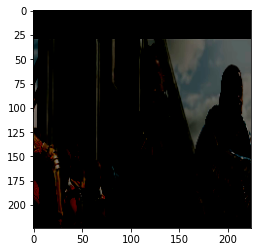

In [26]:
n = 3
sample_image = X_train[n]
final_image = sample_image
print(sample_image.shape)
plt.imshow(sample_image)

# Sample Mask

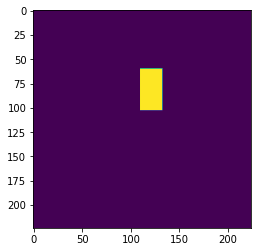

In [27]:
n = 3
sample_mask = masks[n]
final_mask = sample_mask
plt.imshow(sample_mask)

# Predicted Mask

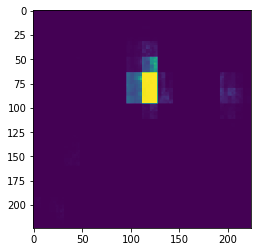

In [28]:
sample_image = np.resize(sample_image, (1, 224, 224, 3))
pred_mask = model.predict(x = sample_image)
pred_mask = np.resize(pred_mask, (224, 224))
plt.imshow(pred_mask)

# PART B

# 1. Read/import images from folder ‘training_images’. [2 Marks]

In [40]:
from PIL import Image
import glob

image_list = []

for filename in glob. glob('training_images/*.jpg'):
    im=Image.open(filename)
    image_list.append(im)



# 2. Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images. [3 Marks]

In [93]:
# loop to itetrate through image in training_images folder

import os
import cv2
from os import listdir
 
# get the path/directory
folder_dir = "F:/UdemySmallProjects/ComputerVision/Project2/training_images"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        print(images)

real_00001.jpg
real_00002.jpg
real_00003.jpg
real_00004.jpg
real_00005.jpg
real_00006.jpg
real_00007.jpg
real_00008.jpg
real_00009.jpg
real_00010.jpg
real_00011.jpg
real_00012.jpg
real_00013.jpg
real_00014.jpg
real_00015.jpg
real_00016.jpg
real_00017.jpg
real_00018.jpg
real_00019.jpg
real_00020.jpg
real_00021.jpg
real_00022.jpg
real_00023.jpg
real_00024.jpg
real_00025.jpg
real_00026.jpg
real_00027.jpg
real_00028.jpg
real_00029.jpg
real_00030.jpg
real_00031.jpg
real_00032.jpg
real_00033.jpg
real_00034.jpg
real_00035.jpg
real_00036.jpg
real_00037.jpg
real_00038.jpg
real_00039.jpg
real_00040.jpg
real_00041.jpg
real_00042.jpg
real_00043.jpg
real_00044.jpg
real_00045.jpg
real_00046.jpg
real_00047.jpg
real_00048.jpg
real_00049.jpg
real_00050.jpg
real_00051.jpg
real_00052.jpg
real_00053.jpg
real_00054.jpg
real_00055.jpg
real_00056.jpg
real_00057.jpg
real_00058.jpg
real_00059.jpg
real_00060.jpg
real_00061.jpg
real_00062.jpg
real_00063.jpg
real_00064.jpg
real_00065.jpg
real_00066.jpg
real_00067

In [101]:
import cv2
import sys

imagePath = sys.argv[1]

images = cv2.imread("F:/UdemySmallProjects/ComputerVision/Project2/training_images")
gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(30, 30)
)

print("[INFO] Found {0} Faces!".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

status = cv2.imwrite('faces_detected.jpg', image)
print("[INFO] Image faces_detected.jpg written to filesystem: ", status)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [100]:
import pandas as pd 

metadata_list = []
imagePath = sys.argv[1]

folder_dir = "F:/UdemySmallProjects/ComputerVision/Project2/training_images"
for images in os.listdir(folder_dir):
 
    # check if the image ends with jpg
        gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
        faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
        faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
    )
print("x,y,w,h,Total Faces,Image_name")
for images in os.listdir(folder_dir):
    for (x, y, w, h) in faces:
        cv2.rectangle(images, (x, y), (x + w, y + h), (0, 255, 0), 2)
        status = cv2.imwrite('faces_detected.jpg', image)
        print(x,y,w,h,len(faces),image)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [99]:
# Detecting faces present in the training_images folder.

import cv2
import sys

imagePath = sys.argv[1]

folder_dir = "F:/UdemySmallProjects/ComputerVision/Project2/training_images"
for images in os.listdir(folder_dir):
    # check if the image ends with png
    imgUMat = cv2.imread(images)
    if (images.endswith(".jpg")):
        gray = cv2.cvtColor(cv2.UMat(imgUMat), cv2.COLOR_RGB2GRAY)
        faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
        faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
    )

print("[INFO] Found {0} Faces!".format(len(faces)))
for image in os.listdir(folder_dir):
    for (x, y, w, h) in faces:
        cv2.rectangle(images, (x, y), (x + w, y + h), (0, 255, 0), 2)

    status = cv2.imwrite('faces_detected.jpg', images)
    print("[INFO] Image faces_detected.jpg written to filesystem: ", status)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# 3. From the same loop above, extract metadata of the faces and write into a DataFrame. [3 Marks]

In [96]:
import pandas as pd 

metadata_list = []
imagePath = sys.argv[1]

folder_dir = "F:/UdemySmallProjects/ComputerVision/Project2/training_images"
for images in os.listdir(folder_dir):
 
    # check if the image ends with jpg
    if (images.endswith(".jpg")):
        gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
        faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
        faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
    )
print("x,y,w,h,Total Faces,Image_name")
for images in os.listdir(folder_dir):
    for (x, y, w, h) in faces:
        cv2.rectangle(images, (x, y), (x + w, y + h), (0, 255, 0), 2)
        status = cv2.imwrite('faces_detected.jpg', image)
        print(x,y,w,h,len(faces),image)
      

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


# 4. Save the output Dataframe in .csv format. [2 Marks]

In [97]:
import pandas as pd 

metadata_list = []


imagePath = sys.argv[1]

folder_dir = "F:/UdemySmallProjects/ComputerVision/Project2/training_images"
for images in os.listdir(folder_dir):
 
    # check if the image ends with jpg
    if (images.endswith(".jpg")):
        gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
        faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
        faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
    )

for images in os.listdir(folder_dir):
    for (x, y, w, h) in faces:
        cv2.rectangle(images, (x, y), (x + w, y + h), (0, 255, 0), 2)
        #status = cv2.imwrite('faces_detected.jpg', image)
        dict = {'x':[x],'y':[y],'w':[w],'h':[h],'Total faces':[len(faces)],'Image_name':[images]}
      
    

df = pd.DataFrame(dict)  
# saving the dataframe
df.to_csv('file.csv')

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


# PART C


# 1. Unzip, read and Load data(‘PINS.zip’) into session. [2 Marks]

In [34]:
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "./PINS.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
PINS/                                          2021-10-20 16:42:36            0
__MACOSX/._PINS                                2021-10-20 16:42:36          212
PINS/pins_mark zuckerberg/                     2021-10-20 16:42:36            0
__MACOSX/PINS/._pins_mark zuckerberg           2021-10-20 16:42:36          212
PINS/pins_amber heard face/                    2021-10-20 16:42:34            0
__MACOSX/PINS/._pins_amber heard face          2021-10-20 16:42:34          212
PINS/pins_Martin Starr/                        2021-10-20 16:42:34            0
__MACOSX/PINS/._pins_Martin Starr              2021-10-20 16:42:34          212
PINS/pins_barbara palvin face/                 2021-10-20 16:42:34            0
__MACOSX/PINS/._pins_barbara palvin face       2021-10-20 16:42:34          212
PINS/pins_Jason Momoa/                         2021-10-20 16:42:32            0
__MACOSX/PINS/._pins_Jason Momoa        

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\UdemySmallProjects\\ComputerVision\\Project2\\PINS\\pins_Natalie Portman \\Natalie Portman 37.jpg'

# 2. Write function to create metadata of the image. [4 Marks]
#  Hint: Metadata means derived information from the available data which can be useful for particular problem statement

# # 3. Write a loop to iterate through each and every image and create metadata for all the images. [4 Marks] 

In [68]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [69]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [70]:
# Load an image
# for example, loading the image with index 1
load_image(metadata[0].image_path())

array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [72]:
from tensorflow.keras.models import model_from_json
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

In [73]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

# 4. Generate Embeddings vectors on the each face in the dataset. [4 Marks]
# Hint: Use ‘vgg_face_weights.h5’


In [74]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [75]:
embeddings = np.zeros((metadata.shape[0], 2622))
k = 0
for i, m in enumerate(metadata):
    try:
        img = load_image(m.image_path())
        if k % 500 == 0:
            print(k)
        # scale RGB values to interval [0,1]
        img = cv2.resize(img, dsize = (224,224))
        img = (img / 255.).astype(np.float32)
        # obtain embedding vector for image
        embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
        k += 1
    except Exception as e:
        print(str(e))
        print(i,m)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000


# 5. Build distance metrics for identifying the distance between two similar and dissimilar images. [4 Marks]

In [76]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

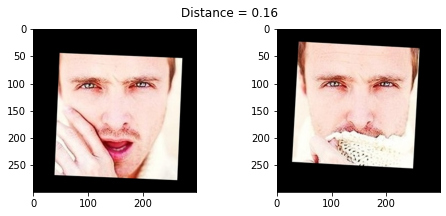

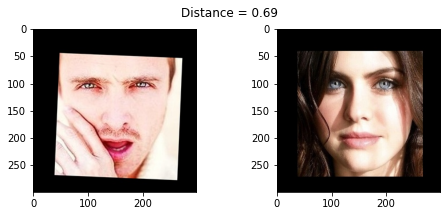

In [77]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

In [78]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]

In [79]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Numerical encoding of identities
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [80]:
# Standarize features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 6. Use PCA for dimensionality reduction. [2 Marks]

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128, svd_solver='randomized', whiten=True)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# 7. Build an SVM classifier in order to map each image to its right person. [4 Marks]

In [82]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', class_weight=None , C=10000000, gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9730893433799784

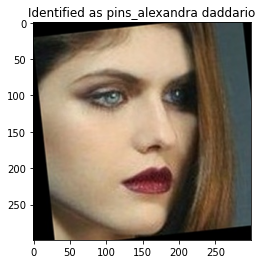

In [83]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = clf.predict([X_test[example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

# 8. Import and display the the test images. [2 Marks]
#  Hint: ‘Benedict Cumberbatch9.jpg’ and ‘Dwayne Johnson4.jpg’ are the test images.

Identified as Benedict Cumberbatch


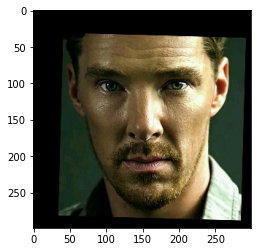

In [85]:
test_image1 = load_image("./Benedict Cumberbatch9.jpg")
print("Identified as Benedict Cumberbatch")
plt.imshow(test_image1)


Identified as Dwayne Johnson


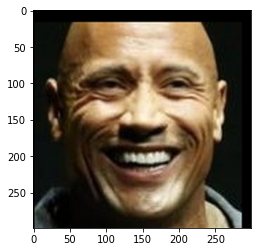

In [86]:
test_image2 = load_image("./Dwayne Johnson4.jpg")
print("Identified as Dwayne Johnson")
plt.imshow(test_image2)

# 9. Use the trained SVM model to predict the face on both test images. [4 Marks]

In [87]:
img_predict = clf.predict(test_image1)
predict_identity = encoder.inverse_transform(img_predict)[0]

plt.imshow(img_predict)
plt.title(f'Identified as {predict_identity}');

ValueError: Found array with dim 3. Estimator expected <= 2.